### Score: `[29]`

Q1. `[9]` Good job!

Q2. `[10+10]` Good job! cbar的颜色可以有区分度一点，方便分清高低值就更好了

各题批注用`### Note`给出，请自行查阅。

Assignment 04
Out: 11/20 19:00
Due: 12/04 19:00

Instructions
Collaboration:

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own.

There are two requirements for collaboration:

Cite your collaborators fully and completely (e.g., “XXX explained to me what is asked in problem set 3”). Or cite online resources (e.g., “I got inspired by reading XXX”) that helped you.

Write your scripts and report independently - the scripts and report must come from you only.

Submitting your assignment:

Please write a report PS4.pdf.

Create a jupyter notebook named PS4.ipynb.

Upload your jupyter notebook and report to your Github ESE5023_Assignments_XXX repository (where XXX is your SUSTech ID) before the due time.

Late Submission:

Late submissions will not receive any credit. The submission time will be determined based on your latest GitHub file records.

1. Global Earthquakes
In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. [10 points]

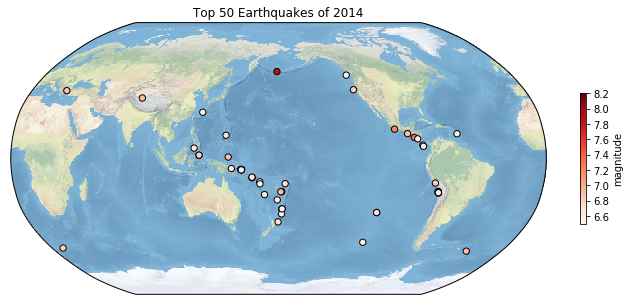

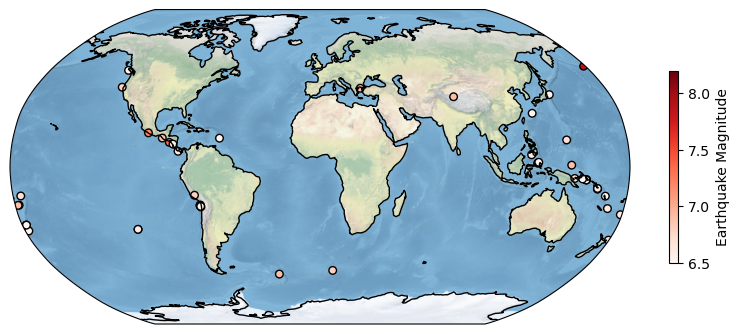

In [75]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import colormaps
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

data=pd.read_csv('usgs_earthquakes.csv',
                 usecols=['time','latitude','longitude','mag'])


data_value = data.sort_values(by='mag', ascending=False)
data_value_50=data_value.head(50)

# 创建颜色映射
cmap = colormaps['Reds'] # 使用红色渐变
norm = colors.Normalize(vmin=data_value_50['mag'].min(), vmax=data_value_50['mag'].max())

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson()) ### Note: 地图的中心经度可以在这里设置

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()
ax.stock_img()
ax.coastlines()

sc = ax.scatter(
    data_value_50['longitude'],  # 经度
    data_value_50['latitude'],   # 纬度
    c=data_value_50['mag'],      # 按震级设定颜色
    cmap=cmap,                   # 使用红色渐变
    norm=norm,                   # 归一化震级范围
    s=30,                        # 点的大小
    edgecolor='k',               # 边框颜色
    transform=ccrs.PlateCarree() # 数据投影方式
)
# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('Earthquake Magnitude')

### Note: No title?

plt.show()     

2. Explore a netCDF dataset

Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

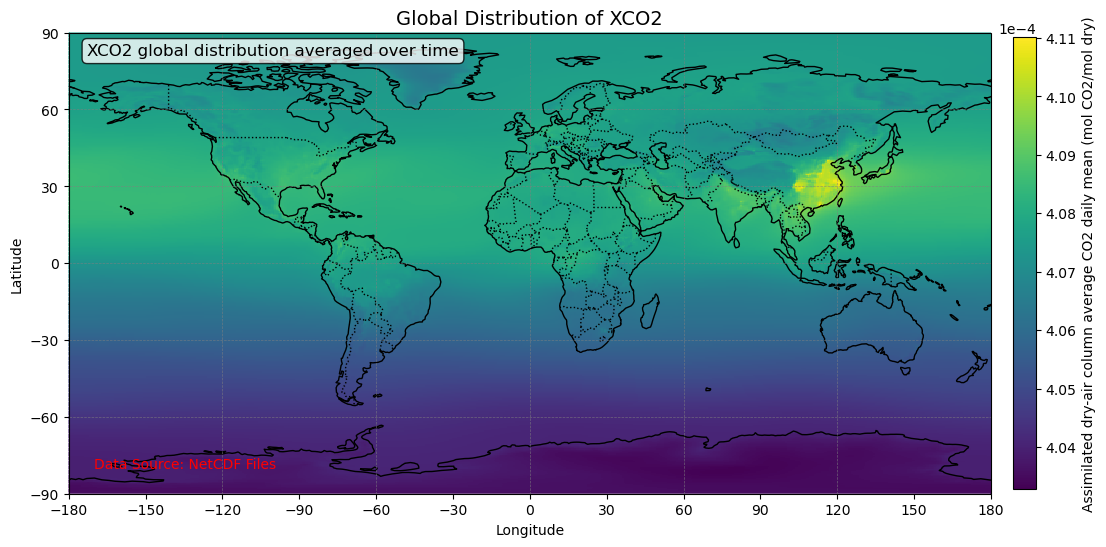

In [117]:
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# 定义文件路径模式
file_pattern = 'D:\\ese5023\\output_file\\*.nc4' 

# 获取所有匹配的文件路径
files = glob.glob(file_pattern)

# 读取并合并多个文件
ds = xr.open_mfdataset(files, combine='by_coords')

#提取相应数据
xco2 = ds['XCO2']

#对时间求平均值
xco2_mean = xco2.mean(dim='time')  

# 创建图形
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 绘制主图 - XCO2 数据
cmap = plt.cm.viridis  # 使用 Viridis 颜色映射
mesh = ax.pcolormesh(
    xco2_mean.lon,
    xco2_mean.lat,
    xco2_mean,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    shading='auto'
)

# 添加颜色条
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02, shrink=0.8)
cbar.set_label(f"{xco2.attrs.get('long_name', 'XCO2')} ({xco2.attrs.get('units', '')})")

# 设置颜色条为科学计数法
cbar.formatter = ticker.ScalarFormatter()
cbar.formatter.set_powerlimits((-3, 3))  # 设置科学计数法显示的范围
cbar.update_ticks()

# 添加标题
ax.set_title("Global Distribution of XCO2", fontsize=14)

# 设置经纬度刻度和标签
ax.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# 添加网格线
ax.gridlines(draw_labels=False, linewidth=0.5, color="gray", alpha=0.7, linestyle="--")

# 添加海岸线和国家边界
ax.coastlines(resolution="110m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# 添加注释
ax.text(-170, -80, "Data Source: NetCDF Files", fontsize=10, color="red")

# 添加文本框
props = dict(boxstyle="round", facecolor="white", alpha=0.8)
ax.text(
    0.02, 0.95, "XCO2 global distribution averaged over time",
    transform=ax.transAxes, fontsize=12, bbox=props
)

# 显示图形
plt.tight_layout()
plt.show()


2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

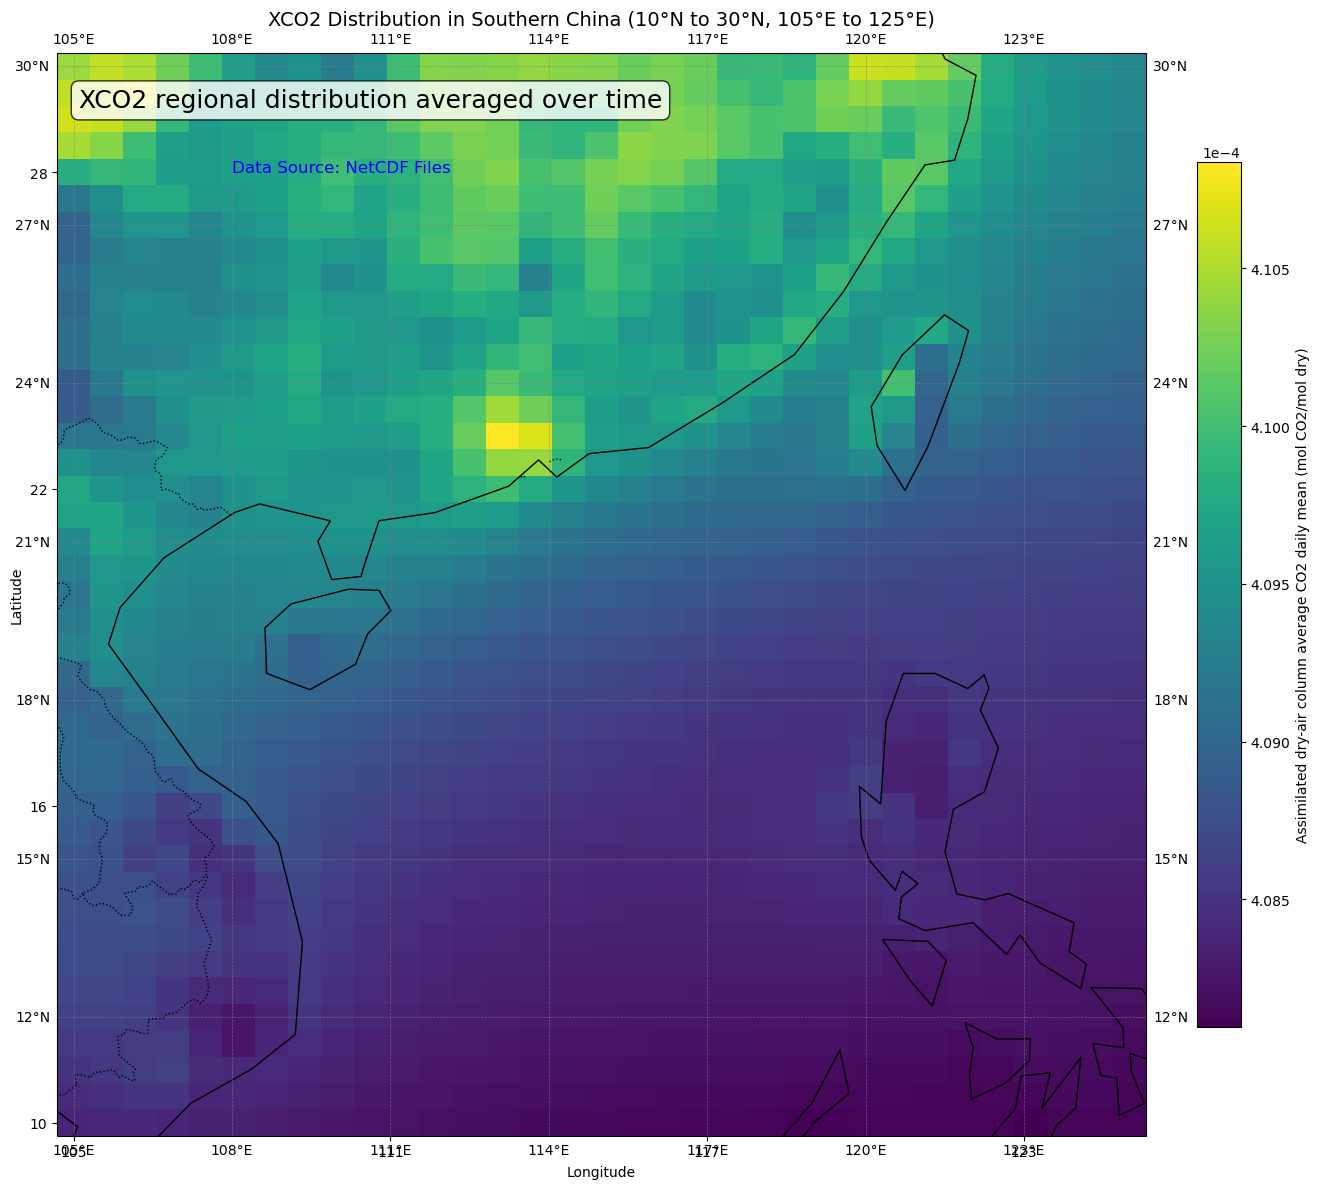

In [113]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# 选择中国南部的经纬度范围
lat_min, lat_max = 10, 30
lon_min, lon_max = 105, 125

# 截取数据范围
xco2_region = xco2.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# 创建图形
fig = plt.figure(figsize=(26, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 绘制中国南部区域 XCO2 数据
cmap = plt.cm.viridis  # 使用 Viridis 颜色映射
mesh = ax.pcolormesh(
    xco2_region.lon,
    xco2_region.lat,
    xco2_region.mean(dim='time'),  # 对时间维度取平均
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    shading='auto'
)

# 添加颜色条
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02, shrink=0.8)
cbar.set_label(f"{xco2.attrs.get('long_name', 'XCO2')} ({xco2.attrs.get('units', '')})")

# 设置颜色条为科学计数法
cbar.formatter = ticker.ScalarFormatter()
cbar.formatter.set_powerlimits((-3, 3))  # 设置科学计数法显示的范围
cbar.update_ticks()

# 添加标题
ax.set_title("XCO2 Distribution in Southern China (10°N to 30°N, 105°E to 125°E)", fontsize=14)

# 设置经纬度刻度和标签
ax.set_xticks(np.arange(lon_min, lon_max+1, 6), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_min, lat_max+1, 6), crs=ccrs.PlateCarree())
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# 添加网格线
ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.7, linestyle="--")

# 添加海岸线和国家边界
ax.coastlines(resolution="110m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# 添加注释
ax.text(108, 28, "Data Source: NetCDF Files", fontsize=12, color="blue")

# 添加文本框
props = dict(boxstyle="round", facecolor="white", alpha=0.8)
ax.text(
    0.02, 0.95, "XCO2 regional distribution averaged over time",
    transform=ax.transAxes, fontsize=18, bbox=props
)

# 显示图形
plt.tight_layout()
plt.show()